
<font size="8"><center>**Heart Failure Analysis**</center></font>

# Group information

| ID       | Name        | Task | Contribution rate |
|:--------:|:------------|:----:|:-----------------:|
| 20127323 | Võ Nhật Tân |      | 50%               |
| 20127447 | Ngô Đức Bảo |      | 50%               |


# Dataset information

## Subject of the data
- Heart failure is a common event caused by cardiovascular diseases (CVDs), which are the main reason leading to death globally. As a result, people with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.

## Source of the data and how this dataset collected?
- This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

    * ***Cleveland***: 303 observations
    * ***Hungarian***: 294 observations
    * ***Switzerland***: 123 observations
    * ***Long Beach VA***: 200 observations
    * ***Stalog (Heart) Data Set***: 270 observations
    
    
        ==> Total: 1190 observations
        Duplicated: 272 observations
        Final dataset: 918 observations

- Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Copyright
- The data is free for sharing, creating and adapting. This license can be seen in that [link](https://opendatacommons.org/licenses/odbl/1-0/).
- The creators of this dataset:
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor:
    * David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


# Data exploration

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [34]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Get size of the dataset

In [35]:
row_size, col_size = heart_df.shape
print(f'A number of column: {col_size}')
print(f'A number of row: {row_size}')

A number of column: 12
A number of row: 918


## Exploring the rows

### Meaning of each rows

- Each row represents the case which is recorded

### Check the duplicated row

In [36]:
count_duplicated_row = heart_df.duplicated().sum()
print(f"Count the duplicated rows: {count_duplicated_row}")

Count the duplicated rows: 0


* Dataset don't have the duplicated rows.

## Exploring the columns

### Meaning of the columns

|  | Attributre     | Description                                                                                          |
|:------:|:---------------|:-----------------------------------------------------------------------------------------------------|
| 1      | Age            | age of the patient [years]                                                                           |
| 2      | Sex            | sex of the patient [M: Male, F: Female]                                                              |
| 3      | ChestPainType  | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| 4      | RestingBP      | resting blood pressure [mm Hg]                                                                       |
| 5      | Cholesterol    | serum cholesterol [mm/dl]                                                                            |
| 6      | FastingBS      | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                                      |
| 7      | RestingECG     | resting electrocardiogram results [Normal, ST, LVH]                                                  |
| 8      | MaxHR          | maximum heart rate achieved [Numeric value between 60 and 202]                                       |
| 9      | ExerciseAngina | exercise-induced angina [Y: Yes, N: No]                                                              |
| 10     | Oldpeak        | oldpeak = ST [Numeric value measured in depression]                                                  |
| 11     | ST_Slope       | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]             |
| 12     | HeartDisease   | output class [1: heart disease, 0: Normal]                                                           |

### Datatype of each columns

In [37]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

With the binary columns, such as `FastingBS`; `ExerciseAngina`; `HeartDisease`, we convert these attributes to boolean datatype.

In [38]:
#Checking the values of these columns
binary_cols = ['FastingBS', 'ExerciseAngina', 'HeartDisease']

for col in binary_cols:
    print(f"Value of {col} column: ", list(heart_df[col].unique()))

Value of FastingBS column:  [0, 1]
Value of ExerciseAngina column:  ['N', 'Y']
Value of HeartDisease column:  [0, 1]


In [39]:
#Convert it into boolean datatype
heart_df["FastingBS"] = heart_df["FastingBS"].astype(bool)
heart_df["ExerciseAngina"] = heart_df["ExerciseAngina"] == 'Y'
heart_df["HeartDisease"] = heart_df["HeartDisease"].astype(bool)

In [40]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS            bool
RestingECG         object
MaxHR               int64
ExerciseAngina       bool
Oldpeak           float64
ST_Slope           object
HeartDisease         bool
dtype: object

### Explore numeric column(s)

In [41]:
heart_num_df = heart_df.select_dtypes(include=[np.int64, np.float64])
heart_num_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [42]:
heart_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          918 non-null    int64  
 1   RestingBP    918 non-null    int64  
 2   Cholesterol  918 non-null    int64  
 3   MaxHR        918 non-null    int64  
 4   Oldpeak      918 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 36.0 KB


918 entries and 918 Non-Null Count --> No **null** value  
So those numeric columns have no missing value!

In [43]:
heart_num_df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [44]:
for col_name in heart_num_df.columns:
    print(f'Column {col_name} - Value counts in each bins: ')
    print(heart_num_df[col_name].value_counts(bins=10, sort=False))
    print('-'*50)

Column Age - Value counts in each bins: 
(27.95, 32.9]     12
(32.9, 37.8]      37
(37.8, 42.7]      86
(42.7, 47.6]     104
(47.6, 52.5]     148
(52.5, 57.4]     201
(57.4, 62.3]     175
(62.3, 67.2]     101
(67.2, 72.1]      39
(72.1, 77.0]      15
Name: Age, dtype: int64
--------------------------------------------------
Column RestingBP - Value counts in each bins: 
(-0.201, 20.0]      1
(20.0, 40.0]        0
(40.0, 60.0]        0
(60.0, 80.0]        1
(80.0, 100.0]      26
(100.0, 120.0]    265
(120.0, 140.0]    405
(140.0, 160.0]    177
(160.0, 180.0]     35
(180.0, 200.0]      8
Name: RestingBP, dtype: int64
--------------------------------------------------
Column Cholesterol - Value counts in each bins: 
(-0.604, 60.3]    172
(60.3, 120.6]       6
(120.6, 180.9]     70
(180.9, 241.2]    319
(241.2, 301.5]    248
(301.5, 361.8]     81
(361.8, 422.1]     14
(422.1, 482.4]      3
(482.4, 542.7]      3
(542.7, 603.0]      2
Name: Cholesterol, dtype: int64
-------------------------

As we can see, `Age` and `MaxHR` columns have suitable values. The remaining columns (`RestingBP` `Cholesterol`, `Oldpeak`) have some abnormal values: the value should to be the positive values but it contains zero number or the negative values.

In [45]:
#RestingBP
values_not_suit = heart_num_df[heart_num_df["RestingBP"] <= 20]["RestingBP"].to_list()
print(f'Values are not suitable in Cholesterol: {set(values_not_suit)}')
print(f'Count records which contain values are not suitable in Cholesterol: {len(values_not_suit)}')

Values are not suitable in Cholesterol: {0}
Count records which contain values are not suitable in Cholesterol: 1


* In the `RestingBP` columns, there is a record which has invalid value. Therefore, the `RestingBP` value of this record is seen as null.

In [46]:
#Cholesterol
values_not_suit = heart_num_df[heart_num_df["Cholesterol"] <= 60.3]["Cholesterol"].to_list()
print(f'Values are not suitable in Cholesterol: {set(values_not_suit)}')
print(f'Count records which contain values are not suitable in Cholesterol: {len(values_not_suit)}')

Values are not suitable in Cholesterol: {0}
Count records which contain values are not suitable in Cholesterol: 172


* As same as `RestingBP` columns, in the `Cholesterol` columns, there are 172 records which has invalid value, but this values are equal by 0. Therefore, the `Cholesterol` value of this record is seen as null.

In [47]:
#Oldpeak
values_not_suit = heart_num_df[heart_num_df["Oldpeak"] <= 0.04]["Oldpeak"].to_list()
print(f'Values are not suitable in Oldpeak: {set(values_not_suit)}')
print(f'Count records which contain values are not suitable in Oldpeak: {len(values_not_suit)}')

Values are not suitable in Oldpeak: {0.0, -0.9, -0.1, -0.7, -0.8, -0.5, -1.0, -2.0, -1.1, -2.6, -1.5}
Count records which contain values are not suitable in Oldpeak: 381


* The percentage of records which have unsuitable values is more higher. Therefore just delete this columns.

In [48]:
heart_df = heart_df.drop(columns=["Oldpeak"])
numeric_cols_df = heart_df.select_dtypes(exclude=[object, bool])

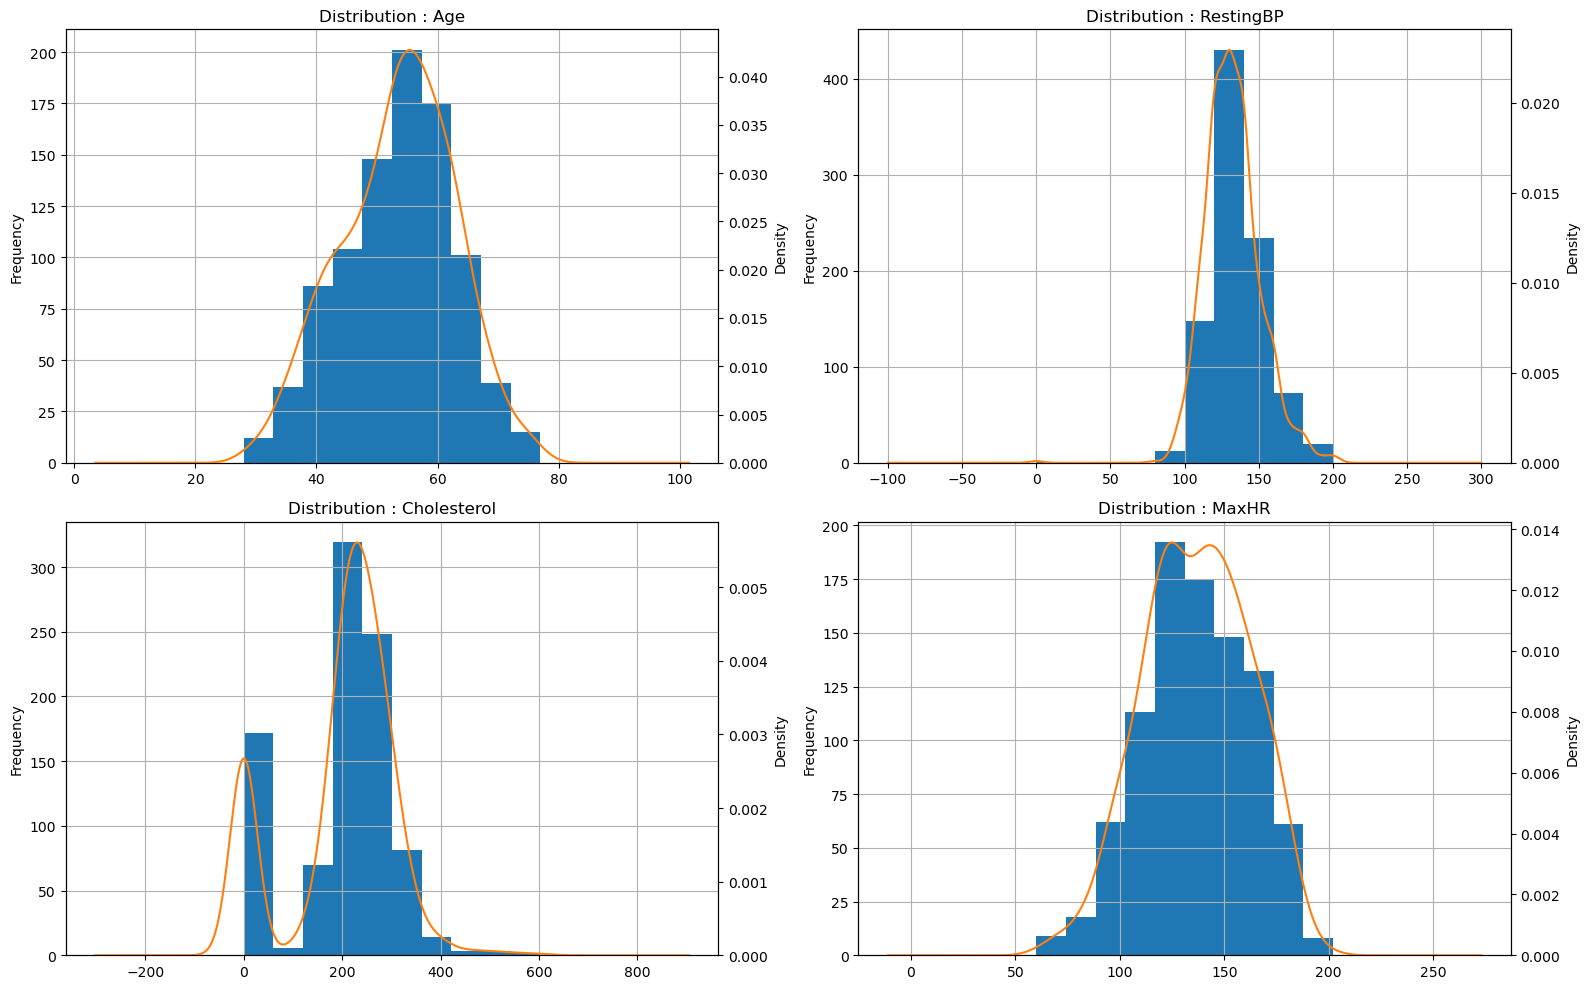

In [49]:
fig, axs = plt.subplots(nrows = 2,ncols = 2, figsize = (16,10))

for i in range(numeric_cols_df.shape[-1]):

    ax = axs[i//2, i%2]
    
    ax1 = numeric_cols_df.iloc[:, i].plot(kind='hist', ax = ax)
    ax2 = numeric_cols_df.iloc[:, i].plot(kind='kde', ax=ax, secondary_y=True, grid=True)
    
    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Density')
    ax2.set_ylim(0)

    title = 'Distribution : ' + numeric_cols_df.columns[i]
    plt.title(title)
    
fig.tight_layout()

With the numberic columns, it is witnessed that the distribution is nearly symmetric

### Explore categorical column(s)

In [50]:
heart_cat_df = heart_df.select_dtypes(include=[object, bool])
heart_cat_df.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,False,Normal,False,Up,False
1,F,NAP,False,Normal,False,Flat,True
2,M,ATA,False,ST,False,Up,False
3,F,ASY,False,Normal,True,Flat,True
4,M,NAP,False,Normal,False,Up,False


In [51]:
heart_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   FastingBS       918 non-null    bool  
 3   RestingECG      918 non-null    object
 4   ExerciseAngina  918 non-null    bool  
 5   ST_Slope        918 non-null    object
 6   HeartDisease    918 non-null    bool  
dtypes: bool(3), object(4)
memory usage: 31.5+ KB


918 entries and 918 Non-Null Count --> No **null** value  
There's no missing values on categorical columns!

In [52]:
for column in heart_cat_df.columns:
    print(heart_cat_df[column].value_counts())
    print('-----------------------------------')

M    725
F    193
Name: Sex, dtype: int64
-----------------------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
-----------------------------------
False    704
True     214
Name: FastingBS, dtype: int64
-----------------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
-----------------------------------
False    547
True     371
Name: ExerciseAngina, dtype: int64
-----------------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
-----------------------------------
True     508
False    410
Name: HeartDisease, dtype: int64
-----------------------------------


#### Explore the binary attributes

In [53]:
binary_cols_df = heart_cat_df.select_dtypes(include='bool')
binary_cols_df.head()

,FastingBS,ExerciseAngina,HeartDisease
0,False,False,False
1,False,False,True
2,False,False,False
3,False,True,True
4,False,False,False


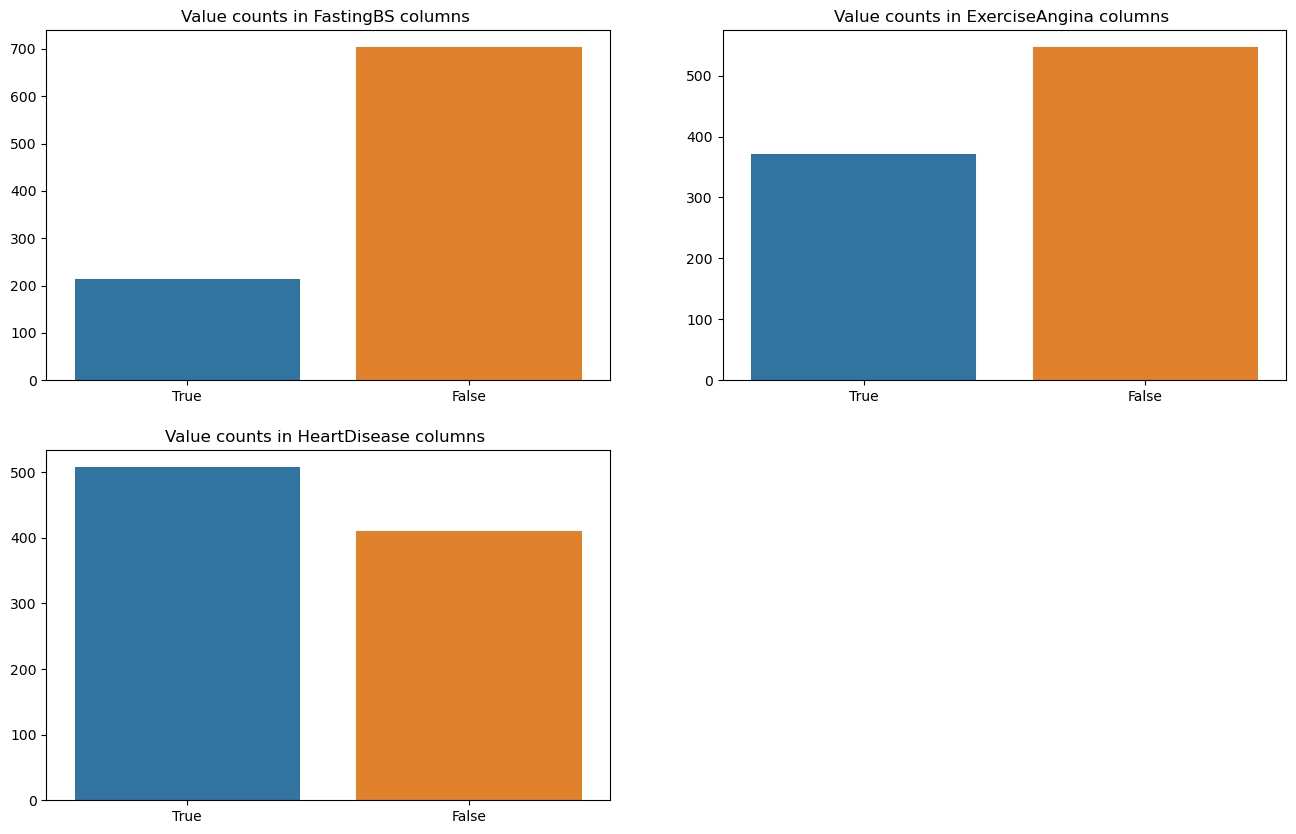

In [138]:
fig, axs = plt.subplots(nrows = 2,ncols = 2,figsize = (16,10))
for i in range(len(binary_cols_df.columns)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=binary_cols_df.iloc[:, i], order=[True, False])
    ax.set(xlabel=None, ylabel=None)
    title = f'Value counts in {binary_cols_df.columns[i]} columns ' 
    plt.title(title)

axs[-1, -1].remove()

A distribution of values `FastingBS` is not asymmetric in comparation with the other columns. Specifically, the amount of fasting blood sugar, which is more than 120md/dl, less than that in the remaining group.

#### Explore object attribute

In [55]:
obj_cols_df = heart_cat_df.select_dtypes(include='object')
obj_cols_df.head()

,Sex,ChestPainType,RestingECG,ST_Slope
0,M,ATA,Normal,Up
1,F,NAP,Normal,Flat
2,M,ATA,ST,Up
3,F,ASY,Normal,Flat
4,M,NAP,Normal,Up


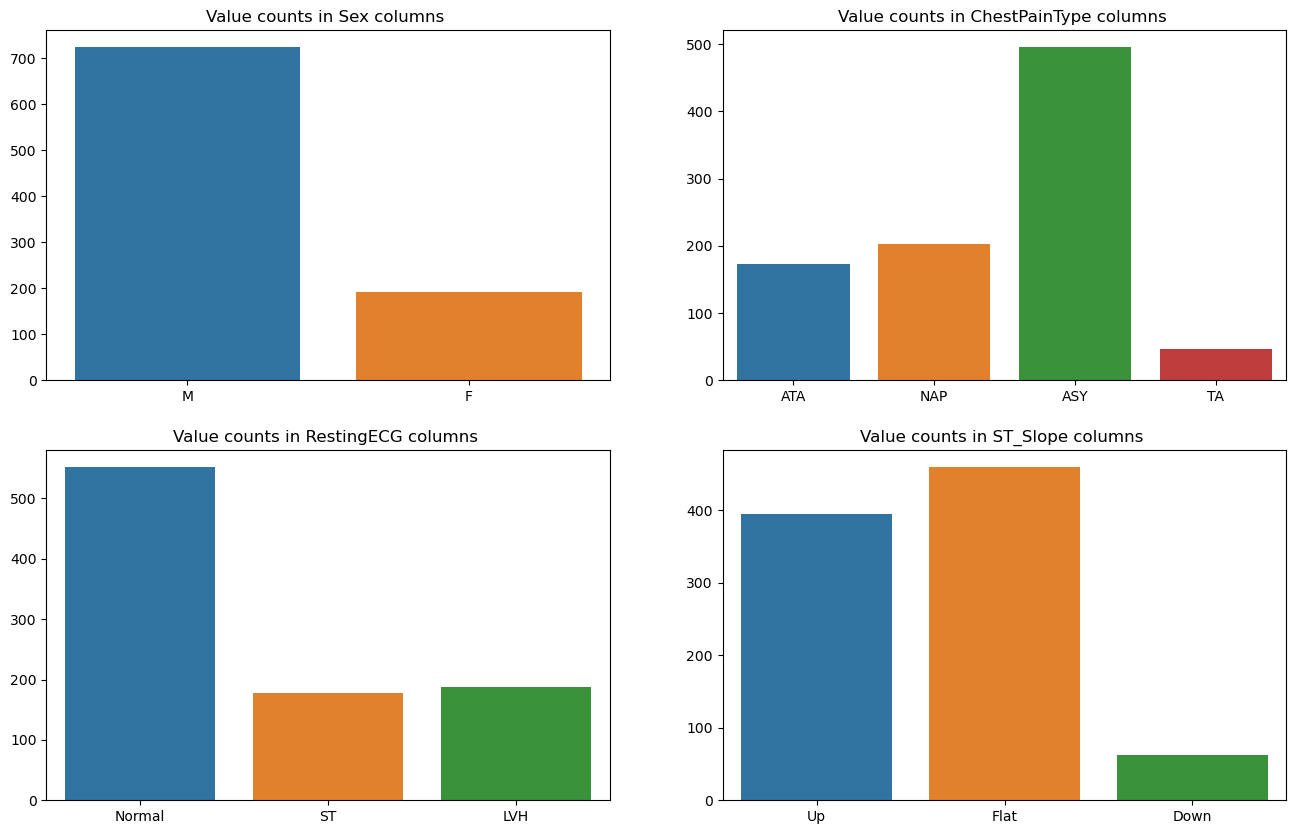

In [56]:
fig, axs = plt.subplots(nrows = 2,ncols = 2,figsize = (16,10))
for i in range(len(obj_cols_df.columns)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=obj_cols_df.iloc[:, i])
    ax.set(xlabel=None, ylabel=None)
    title = f'Value counts in {obj_cols_df.columns[i]} columns ' 
    plt.title(title)

As we can see here:
* `Sex`: the number of male is bigger than the number of female, which may cause biased conclusion.
* `ChestPainType`: a lot of people are Asymptomatic (ASY), less people with clear symptoms (ATA, NAP, ASY, TA).
* `RestingECG`: just like `ChestPainType`, lots of people have normal `RestingECG` while less have ST or LVH.
* `ST_Slope`: lots of people have Up or Flat `ST_Slope` and a little have Down `ST_Slope`. But thinking as 'The normal ST segment during exercise therefore slopes sharply upwards', we may merge Flat and Down feature!

### Further explore

In numeric columns, are there any correlation?

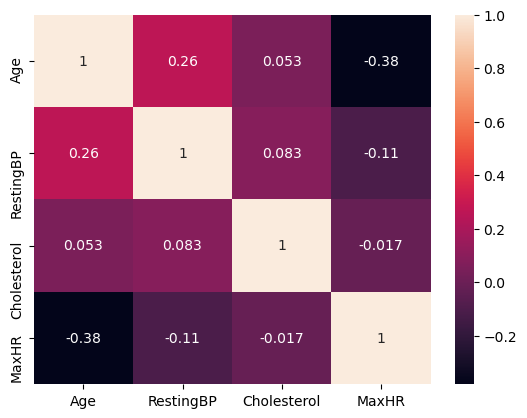

In [79]:
# First let just fill null (zero) value in Cholesterol and RestingBP with mean of its column
temp_numeric_col_df = numeric_cols_df.copy()

restingBP_not_null = temp_numeric_col_df[temp_numeric_col_df['RestingBP'] != 0]
restingBP_mean = restingBP_not_null['RestingBP'].mean()
cholesterol_not_null = temp_numeric_col_df[temp_numeric_col_df['Cholesterol'] != 0]
cholesterol_mean = cholesterol_not_null['Cholesterol'].mean()

temp_numeric_col_df['RestingBP'].replace(to_replace=0, value=restingBP_mean, inplace=True)
temp_numeric_col_df['Cholesterol'].replace(to_replace=0, value=cholesterol_mean, inplace=True)

sns.heatmap(temp_numeric_col_df.corr(), annot=True);

As we can see here:
* (`RestingBP` - `Age`) are positively corretated.
* (`Cholesterol` - `RestingBP`), (`Cholesterol` - `Age`) are slightly positively corretated.
* (`Cholesterol` - `MaxHR`) are slightly negatively corretated.
* (`MaxHR` - `RestingBP`), (`MaxHR` - `Age`) are slightly negatively corretated.

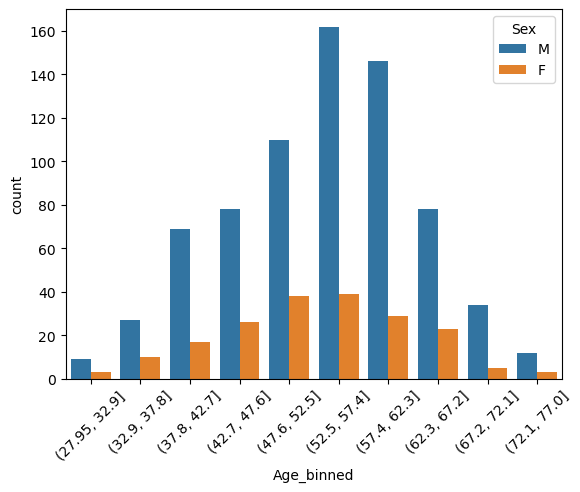

In [118]:
bins = heart_num_df['Age'].value_counts(bins=10, sort=False).index
heart_df['Age_binned'] = pd.cut(heart_df['Age'], bins)
ax = sns.countplot(data=heart_df, x='Age_binned', hue='Sex')
plt.xticks(rotation=45);

Distribution in each sex column is symmetric but the number of male is always large than the number of female.

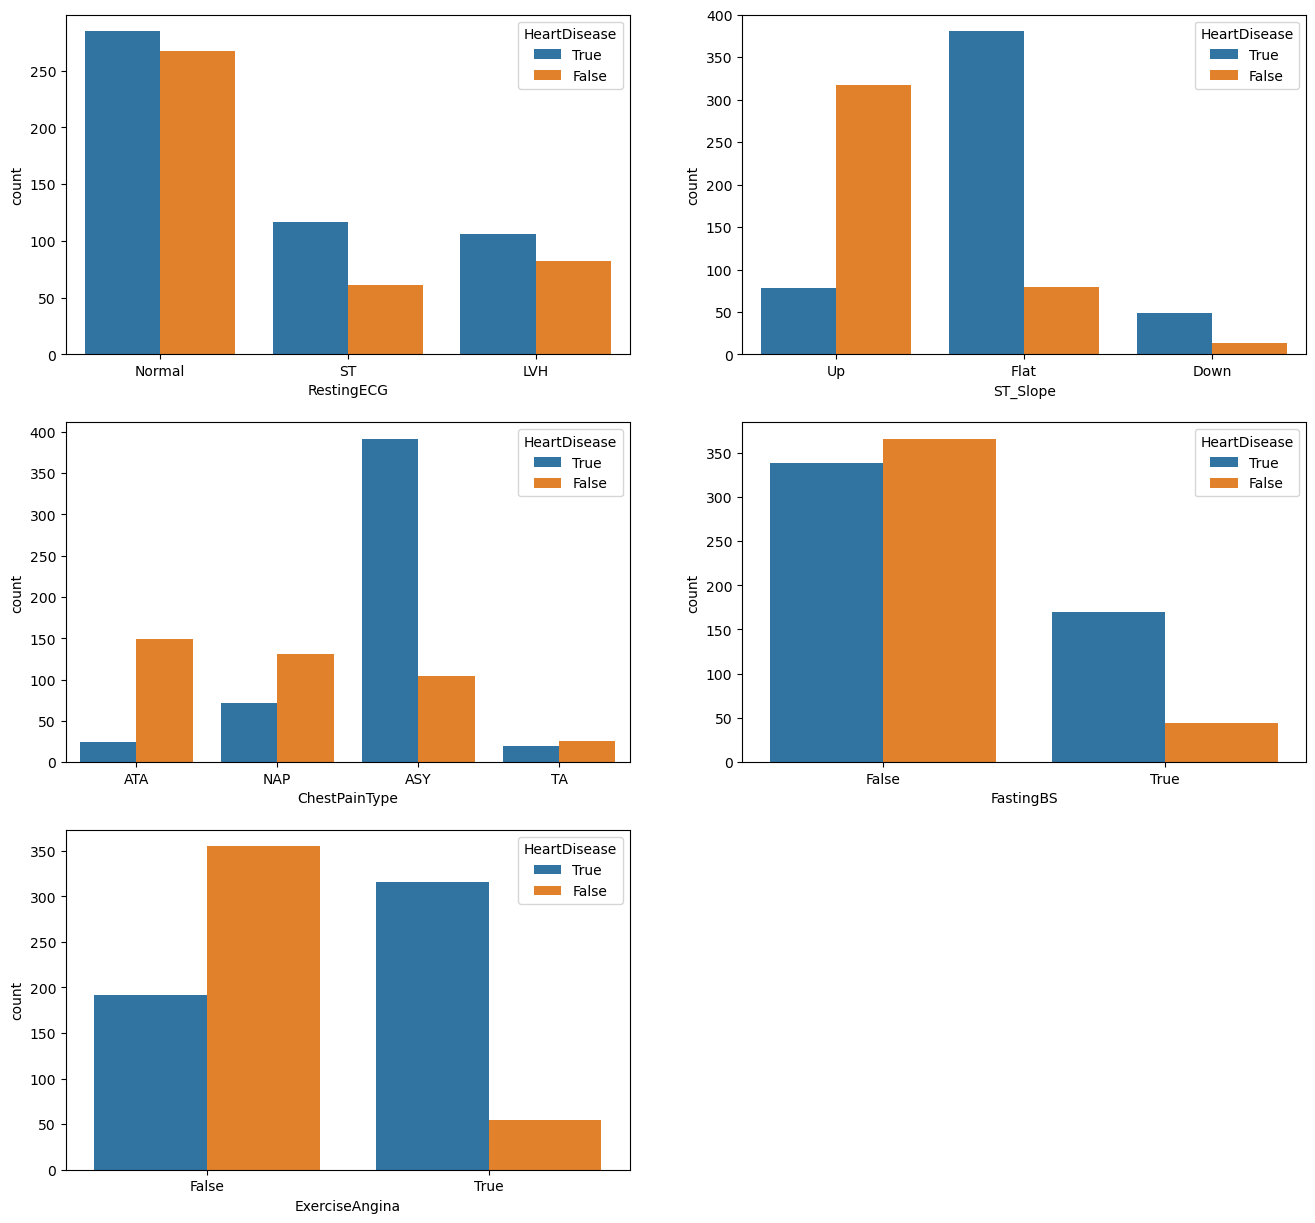

In [139]:
consider_cols = ['RestingECG', 'ST_Slope', 'ChestPainType', 'FastingBS', 'ExerciseAngina']
fig, axs = plt.subplots(nrows = 3,ncols = 2, figsize = (16,15))

for i in range(len(consider_cols)):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=heart_df, x=consider_cols[i], hue='HeartDisease', hue_order=[True, False])

axs[-1, -1].remove()

For almost attributes except `RestingECG` and `FastingBS`, we can clearly see the differences between the `HeartDisease` outcomes in each categorical value. However, there is less constrast in the outcomes of `HeartDisease` in the remaining attributes. Although the `FastingBS` is witnessed that trend, it doesn't have more information enough to fully conclude. So we will use `RestingECG` for further exploration.